### Reading Data With Keras


In [1]:
#getting GPU Runtime
!nvidia-smi

Tue Jul 26 16:00:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten , Input , MaxPool2D
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt

In [3]:
# unpacking data
from google.colab import drive
drive.mount('/content/drive')
train_path='/content/drive/My Drive/cv second project/Training'
test_path='/content/drive/My Drive/cv second project/Test'
# reading train data with keras
train_dataset = tf.keras.utils.image_dataset_from_directory(
  train_path,
  label_mode='categorical',
  shuffle=False,
  image_size=(100,100),
  color_mode='rgb')
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
# reading test data with keras
test_dataset = tf.keras.utils.image_dataset_from_directory(
  test_path,
  label_mode='categorical',
  shuffle=False,
  image_size=(100,100),
  color_mode='rgb')
AUTOTUNE = tf.data.AUTOTUNE
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 41322 files belonging to 81 classes.
Found 13877 files belonging to 81 classes.


### Building Model Using Pre Trained CNN VGG16

In [4]:
#building keras model
# # reading vgg16 model
model = VGG16(weights='imagenet' , include_top=False , input_shape=(100,100,3))
# # freezing layers to add new layers later
for layer in model.layers:
  layer.trainable = False
# changing model
output = model.output
layer = tf.keras.layers.Flatten()(output)
layer = tf.keras.layers.Dense(units=81 , activation='softmax')(layer)
model = tf.keras.Model(
        inputs=model.input,
        outputs=layer,
    )
# compiling model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False) , optimizer="Adam" , metrics = ["accuracy"])
print(model.summary())
history = model.fit(train_dataset  , epochs=10 ,batch_size=32)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

### Evaluating Model

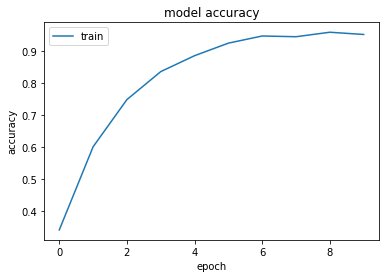

In [5]:
# showing accuracies
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

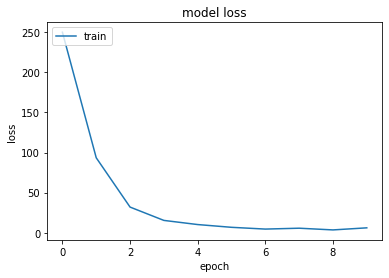

In [6]:
# showing losses
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [7]:
model.evaluate(test_dataset)

434/434 [==============================] - 468s 1s/step - loss: 36.7377 - accuracy: 0.8180


[36.73771286010742, 0.8179721832275391]